<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/Copy_of_forestCoverLogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contributors
* Tadd Backus
* Kendall Scott
* Austin Webb
* Milan Patel


In [2]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [3]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from google.colab import files

pd.set_option('display.max_columns',None)

In [46]:
# Reading and cleaning the data
# forest_cover_type = files.upload()

forest_cover_type = pd.read_csv("covtype.csv")
# subset df to make binary categorical
# second number not inclusive
Wilderness_Area = forest_cover_type.iloc[:, 10:14]

#
Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)
Wilderness_Area


# subset df to make binary categorical
# second number not inclusive
Soil_Type = forest_cover_type.iloc[:, 14:54]

#
Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)
Soil_Type

# only keep the new column
Soil_Type = Soil_Type[['Soil_Type']]
Soil_Type

Wilderness_Area = Wilderness_Area[['Wilderness_Area']]
Wilderness_Area

# Add new columns to df
forest_cover_type['Soil_Type'] = Soil_Type
forest_cover_type['Wilderness_Area'] = Wilderness_Area

# delete first few characters in column so we only have number

forest_cover_type['Soil_Type'] = forest_cover_type['Soil_Type'].str[9:]
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].str[15:]

# delete superfluous columns now that new columsn are added
forest_cover_type.drop(forest_cover_type.iloc[:, 10:54], 
                       axis = 1, 
                       inplace = True)
forest_cover_type.head()

<ipython-input-46-b2213be2f756>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)
<ipython-input-46-b2213be2f756>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,29,1


In [47]:
# Creating a new dataset that only contains the most common cover types
#updated to all
forestDF = forest_cover_type
forestDF

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,2,3
581008,2391,152,19,67,12,95,240,237,119,845,3,2,3
581009,2386,159,17,60,7,90,236,241,130,854,3,2,3
581010,2384,170,15,60,5,90,230,245,143,864,3,2,3


#### Renaming cover type to actual names

## Create Models

We decided to compare 2 different logistic regression tactics, in order to determine what model worked best to predict Cover Type.

For our first model, we decided to look at the most prominent cover types only (Spruce/Fir and Lodgepole Pine). 

The other model predicted all cover types, and was included in our intial analysis of this dataset. 

After comparing the results, we will make a recommendation for which model to implement in order to predict Cover Type.


## Create Models 50

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

# Logistic Regression

Due to the high colinearity between the Hillshade variables, we limited the data down to Hillshade noon only.

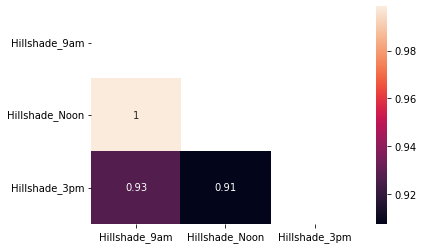

In [6]:
simpleStats = forest_cover_type.describe()

simpleStats.reset_index(inplace=True)
num_col = forest_cover_type._get_numeric_data().columns
simpleStats = simpleStats[simpleStats['index'] != 'count']

# make list of hillside variables
hillside = ['Hillshade_9am','Hillshade_Noon',
                        'Hillshade_3pm']
hillside_df=simpleStats[hillside]

# Correlation df
cormat = hillside_df.corr()
# Round to two decimals
round(cormat, 2)

# heatmap of the correlations
matrix = np.triu(np.ones_like(cormat, dtype=bool))
sns.heatmap(cormat, annot = True, mask = matrix);

In [48]:
forestDF= forestDF.drop(['Hillshade_3pm', 'Hillshade_9am'], axis=1)

In [8]:
# Assign specific features to two different variables
if 'Cover_Type' in forestDF:
    Y = forestDF['Cover_Type'].values
    del forestDF['Cover_Type']
    X = forestDF.values

In [9]:
X

array([[2596, 51, 3, ..., 6279, '29', '1'],
       [2590, 56, 2, ..., 6225, '29', '1'],
       [2804, 139, 9, ..., 6121, '12', '1'],
       ...,
       [2386, 159, 17, ..., 854, '2', '3'],
       [2384, 170, 15, ..., 864, '2', '3'],
       [2383, 165, 13, ..., 875, '2', '3']], dtype=object)

In [10]:
#Creating cross validation object
num_cv_iter = 10
num_instances = len(Y)
cv_object = ShuffleSplit(n_splits=num_cv_iter,test_size=0.2)
print(cv_object)

ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)


In [11]:
# Creating logistic regression object
lr_clf = LogisticRegression(penalty='l2',C=1.0,class_weight=None)

In [12]:
#Running logistic regression on 10 random test/train splits
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_object.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))
    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.5918005559236853
Confusion Matrix 
 [[25127 17336   176     0     0     0    51]
 [13092 42241   694     0     0     9    32]
 [  271  5489  1368     0     0    34     0]
 [    3   514    42     0     0     4     0]
 [  404  1541    15     0     0     0     0]
 [  274  2869   367     0     0     8     0]
 [ 3619   582    16     0     0     0    25]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.5934098086968495
Confusion Matrix 
 [[25100 16785   284     0     0     7     1]
 [13445 42350   802     0     0     8     1]
 [  320  5491  1495     0     0    33     0]
 [    4   526    52     0     0     4     0]
 [  401  1536    13     0     0     0     0]
 [  275  2724   430     0     0    11     0]
 [ 3499   587    19     0     0     0     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 2 ****
Accuracy 0.5935905269227129
Confusion Matrix 
 [[25124 17370   138     0     0     9     2]
 [13172 42677   622     0     0    28     1]
 [  325  5539  1154     0     0    77     0]
 [    2   495    36     0     0     5     0]
 [  411  1528     5     0     0     0     0]
 [  272  2779   362     0     0    22     0]
 [ 3490   557     1     0     0     0     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 3 ****
Accuracy 0.5935044706246827
Confusion Matrix 
 [[24679 17122   210     0     0     1     6]
 [13345 42780   717     0     0     6     0]
 [  298  5385  1505     0     0    27     0]
 [    2   511    47     0     0     3     0]
 [  383  1542    10     0     0     0     0]
 [  296  2678   488     0     0     3     0]
 [ 3589   563     7     0     0     0     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 4 ****
Accuracy 0.5928590483894564
Confusion Matrix 
 [[24395 17411   235     0     0     7     0]
 [13142 43126   667     0     0    14     0]
 [  296  5492  1364     0     0    36     0]
 [    1   518    40     0     0     2     0]
 [  388  1545     9     0     0     0     0]
 [  272  2758   398     0     0     7     0]
 [ 3452   621     7     0     0     0     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 5 ****
Accuracy 0.5922824711926542
Confusion Matrix 
 [[24024 18209   250     0     0     0    10]
 [12408 43434   640     0     0     2     1]
 [  296  5481  1367     0     0     4     0]
 [    2   493    61     0     0     0     0]
 [  404  1513    11     0     0     0     0]
 [  270  2817   405     0     0     0     0]
 [ 3390   696    15     0     0     0     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 6 ****
Accuracy 0.5935044706246827
Confusion Matrix 
 [[24121 17828   169     0     0     7     6]
 [12565 43750   614     0     0    14     3]
 [  282  5800  1075     0     0    56     0]
 [    1   520    29     0     0     2     0]
 [  378  1471     8     0     0     0     0]
 [  268  2893   252     0     0    21     0]
 [ 3460   608     2     0     0     0     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 7 ****
Accuracy 0.5917403165150642
Confusion Matrix 
 [[24660 17211   168     0     0     0     0]
 [13283 42943   547     0     0     2     0]
 [  333  5718  1156     0     0    17     0]
 [    2   475    47     0     0     0     0]
 [  397  1510    14     0     0     0     0]
 [  320  2920   297     0     0     3     0]
 [ 3550   622     8     0     0     0     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 8 ****
Accuracy 0.5928762596490624
Confusion Matrix 
 [[24034 18051   183     0     0     7     0]
 [12596 43722   587     0     0    13     0]
 [  282  5685  1125     0     0    26     0]
 [    2   513    28     0     0     0     0]
 [  364  1453    11     0     0     0     0]
 [  219  2930   313     0     0    13     0]
 [ 3412   632     2     0     0     0     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 9 ****
Accuracy 0.5876096142096159
Confusion Matrix 
 [[23093 18951    68     0     0     3    28]
 [12368 44191   260     0     0    18     3]
 [  293  5787   977     0     0    44     0]
 [    3   522    33     0     0     1     0]
 [  389  1519     6     0     0     0     0]
 [  357  2904   232     0     0    11     0]
 [ 3338   794     0     0     0     0    10]]


In [13]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=Y, cv=cv_object) # this also can help with parallelism
print(accuracies)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.5934012  0.59787613 0.59373682 0.59287626 0.59319467 0.59451133
 0.58797966 0.59284184 0.59503627 0.59546655]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We decided to leverage Random Forest to eliminate some of the variables included in the model, to see if there is an increase in performance in a simpler model.

In [17]:
from sklearn.ensemble import RandomForestRegressor
# https://realpython.com/logistic-regression-python/#logistic-regression-in-python
forest_cover_type_copy = pd.read_csv('covtype.csv') 

# subset df to make binary categorical
# second number not inclusive
Wilderness_Area = forest_cover_type_copy.iloc[:, 10:14]
Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)

# subset df to make binary categorical
# second number not inclusive
Soil_Type = forest_cover_type_copy.iloc[:, 14:54]
Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)

# only keep the new column
Soil_Type = Soil_Type[['Soil_Type']]
Wilderness_Area = Wilderness_Area[['Wilderness_Area']]

# Add new columns to df
forest_cover_type_copy['Soil_Type'] = Soil_Type
forest_cover_type_copy['Wilderness_Area'] = Wilderness_Area

# delete first few characters in column so we only have number
forest_cover_type_copy['Soil_Type'] = forest_cover_type_copy['Soil_Type'].str[9:]
forest_cover_type_copy['Wilderness_Area'] = forest_cover_type_copy['Wilderness_Area'].str[15:]

# delete superfluous columns now that new columsn are added
forest_cover_type_copy.drop(forest_cover_type_copy.iloc[:, 10:54], 
                       axis = 1, 
                       inplace = True)



<ipython-input-17-12403de53534>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)
<ipython-input-17-12403de53534>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)


In [18]:
print(forest_cover_type_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581012 non-null  int64 
 1   Aspect                              581012 non-null  int64 
 2   Slope                               581012 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64 
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64 
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64 
 6   Hillshade_9am                       581012 non-null  int64 
 7   Hillshade_Noon                      581012 non-null  int64 
 8   Hillshade_3pm                       581012 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64 
 10  Cover_Type                          581012 non-null  int64 
 11  Soil_Type                           581

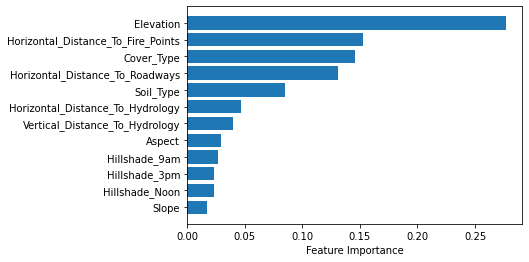

In [ ]:
# Assign specific features to two different variables
X= forest_cover_type_copy.drop(['Cover_Type'], axis=1)
y = forest_cover_type_copy.iloc[:, 10]

# Feature Importance Graph
# Takes about five minutes
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(X, y)
sort = rf.feature_importances_.argsort()
plt.barh(forest_cover_type_copy.columns.values[sort], rf.feature_importances_[sort])
plt.xlabel('Feature Importance')
plt.show()

Based on the importance output, we decided to build a simplified model on:

*   Elevation
*   Horizontal Distance to Fire Points
*   Soil Type
*   Horizontal Distance to Roadways
*   Wilderness Area
*   Horizontal Distance To Hydrology
*   Hillshade noon
*   Aspect
*   Slope




In [20]:
forestDF

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,232,6279,29,1
1,2590,56,2,212,-6,390,235,6225,29,1
2,2804,139,9,268,65,3180,238,6121,12,1
3,2785,155,18,242,118,3090,238,6211,30,1
4,2595,45,2,153,-1,391,234,6172,29,1
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,237,837,2,3
581008,2391,152,19,67,12,95,237,845,2,3
581009,2386,159,17,60,7,90,241,854,2,3
581010,2384,170,15,60,5,90,245,864,2,3


In [49]:
forestDF = pd.DataFrame().assign(
                Elevation=forestDF['Elevation'], 
                Horizontal_Distance_To_Fire_Points=forestDF['Horizontal_Distance_To_Fire_Points'],
                Soil_Type=forestDF['Soil_Type'],
                Horizontal_Distance_To_Roadways=forestDF['Horizontal_Distance_To_Roadways'],
                Wilderness_Area=forestDF['Wilderness_Area'], 
                Horizontal_Distance_To_Hydrology=forestDF['Horizontal_Distance_To_Hydrology'],
                Hillshade_Noon=forestDF['Hillshade_Noon'],
                Aspect=forestDF['Aspect'],
                Slope=forestDF['Slope'],
                                                      )


In [50]:
# Assign specific features to two different variables
if 'Cover_Type' in forestDF:
    Y = forestDF['Cover_Type'].values
    del forestDF['Cover_Type']
    X = forestDF.values

In [51]:
# Re-creating logistic regression object
lr_clf = LogisticRegression(penalty='l2',C=1.0,class_weight=None)

In [ ]:
#Running logistic regression on 10 random test/train splits
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_object.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))
    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.5933925974372435
Confusion Matrix 
 [[24625 17526   145     0     0     4    41]
 [12904 43246   496     0     0     7    20]
 [  306  5609  1059     0     0    42     0]
 [    1   492    40     0     0     0     0]
 [  435  1545    16     0     0     0     0]
 [  282  2905   299     0     0    15     0]
 [ 3531   601     2     0     0     0     9]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.594709258797105
Confusion Matrix 
 [[25282 16954   171     0     0    19    11]
 [13499 42481   687     0     0    35     2]
 [  254  5481  1293     0     0   128     0]
 [    1   496    27     0     0    10     0]
 [  395  1456    18     0     0     0     0]
 [  286  2764   372     0     0    47     0]
 [ 3477   539    14     0     0     0     4]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 2 ****
Accuracy 0.595165357176665
Confusion Matrix 
 [[25077 17042   257     0     0     4    39]
 [13126 42626   747     0     0     6    20]
 [  308  5393  1437     0     0    21     0]
 [    1   505    44     0     0     0     0]
 [  405  1447    18     0     0     0     0]
 [  286  2747   498     0     0     5     0]
 [ 3551   565    13     0     0     0    15]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 3 ****
Accuracy 0.5949157939123775
Confusion Matrix 
 [[25340 17005   221     0     0     6    21]
 [13354 42378   806     0     0    19     8]
 [  319  5204  1390     0     0    68     0]
 [    1   486    50     0     0     4     0]
 [  392  1465    26     0     0     0     0]
 [  300  2703   438     0     0    10     0]
 [ 3607   552    17     0     0     0    13]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 4 ****
Accuracy 0.5935130762544857
Confusion Matrix 
 [[24929 17049   155     0     0     8    60]
 [13386 42747   680     0     0    35    18]
 [  273  5565  1227     0     0    98     0]
 [    2   501    37     0     0     5     0]
 [  384  1442    11     0     0     0     0]
 [  258  2740   379     0     0    41     0]
 [ 3553   584    12     0     0     0    24]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 5 ****
Accuracy 0.5943047941963633
Confusion Matrix 
 [[24867 17137   245     0     0    29     0]
 [13230 42764   674     0     0    50     0]
 [  293  5383  1399     0     0    65     0]
 [    5   501    55     0     0     4     0]
 [  425  1528     9     0     0     0     0]
 [  279  2654   471     0     0    30     0]
 [ 3481   615    10     0     0     0     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 6 ****
Accuracy 0.5937970620379852
Confusion Matrix 
 [[24761 17227   181     0     0    18    30]
 [13069 42940   703     0     0    27    19]
 [  280  5457  1273     0     0    76     0]
 [    1   532    45     0     0     6     0]
 [  370  1458    14     0     0     0     0]
 [  293  2844   369     0     0    18     0]
 [ 3558   615    10     0     0     0     9]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 7 ****
Accuracy 0.5908195141261413
Confusion Matrix 
 [[24572 17724   185     0     0     0    22]
 [13024 42829   570     0     0     3    13]
 [  290  5701  1246     0     0    20     0]
 [    3   516    31     0     0     0     0]
 [  395  1514    15     0     0     0     0]
 [  257  2876   329     0     0     5     0]
 [ 3479   570    11     0     0     0     3]]


In [ ]:
accuracies = cross_val_score(lr_clf, X, y=Y, cv=cv_object) # this also can help with parallelism
print(accuracies)

## Model Advantages 10
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

## Interpret Feature Importance 30

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

## Looking at weights of the complex model

In [ ]:
weights = lr_clf.coef_.T
varNames = forestDF.columns
for coef, name in zip(weights,varNames):
    print(name,'has weight of',coef[0])

### Scaling the weights for interpretability

In [ ]:
sclObj = StandardScaler()
sclObj.fit(X[train_indices])

X_trainScaled = sclObj.transform(X[train_indices])
x_testScaled = sclObj.transform(X[test_indices])

lrs_clf = LogisticRegression(penalty='l2',C=0.05)
lrs_clf.fit(X_trainScaled,Y[train_indices])

y_hatS = lrs_clf.predict(x_testScaled)

acc = mt.accuracy_score(Y[test_indices],y_hatS)
conf = mt.confusion_matrix(Y[test_indices],y_hatS)
print('accuracy:',acc)
print(conf)

zipVars = zip(lrs_clf.coef_.T,forestDF.columns)
zipVars = sorted(zipVars)

for coef, name in zipVars:
    print(name,'has weight of', coef[0])
    

### Plotting weights (scaled weights)

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
weights = pd.Series(lrs_clf.coef_[0],index=forestDF.columns)
weights.plot(kind='bar')
plt.show()

# Support Vector Machine

### Creating and running the SVM using the scaled and split sets from earlier

## Interpret Support Vectors(10)

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.

In [ ]:
##SVM

for train_indices, test_indices in cv_object.split(X,Y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = Y[train_indices]
    
    X_test = X[test_indices]
    y_test = Y[test_indices]

X_train_scaled = sclObj.transform(X_train) # apply to training
X_test_scaled = sclObj.transform(X_test)



In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

### *below here isn't yet edited to work, but pulls from example notebook for how to interpret the support vector (like he mentioned we should do in class)*

In [ ]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = forest_cover_type.groupby(['Cover_Type'])
df_grouped = forest_cover_type.groupby(['Cover_Type'])

# plot KDE of Different variables
vars_to_plot = ['Age','Pclass','IsMale','FamilySize']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Perished','Survived'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Perished','Survived'])
    plt.title(v+' (Original)')

In [ ]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df_imputed.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['Survived'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
df_imputed['Survived'] = y # also add it back in for the original data
df_support.info()